In [106]:
import seaborn as sns
import numpy as np
import pandas as pd
import statistics as st 
import matplotlib.pyplot as plt
import sklearn.model_selection as sk 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import linear_model
df=pd.read_csv(r"C:\Users\Sara\Downloads\laptop_price.csv",encoding='latin-1')

In [108]:
#understand data
print(df.describe())
print(df.info())
#no columns with missing data

         laptop_ID       Inches  Price_euros
count  1303.000000  1303.000000  1303.000000
mean    660.155794    15.017191  1123.686992
std     381.172104     1.426304   699.009043
min       1.000000    10.100000   174.000000
25%     331.500000    14.000000   599.000000
50%     659.000000    15.600000   977.000000
75%     990.500000    15.600000  1487.880000
max    1320.000000    18.400000  6099.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory       

In [110]:
#Ram and  Weight can be converted to int
df["Ram"]=df["Ram"].str.strip('GB')
df["Weight"]=df["Weight"].str.strip('kg')
df["Ram"]=df["Ram"].astype('int64')
df["Weight"]=df["Weight"].astype('float64')
print(df.describe())
print(df.info())

         laptop_ID       Inches          Ram       Weight  Price_euros
count  1303.000000  1303.000000  1303.000000  1303.000000  1303.000000
mean    660.155794    15.017191     8.382195     2.038734  1123.686992
std     381.172104     1.426304     5.084665     0.665475   699.009043
min       1.000000    10.100000     2.000000     0.690000   174.000000
25%     331.500000    14.000000     4.000000     1.500000   599.000000
50%     659.000000    15.600000     8.000000     2.040000   977.000000
75%     990.500000    15.600000     8.000000     2.300000  1487.880000
max    1320.000000    18.400000    64.000000     4.700000  6099.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName      

In [112]:
print(df.columns)

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')


Inches


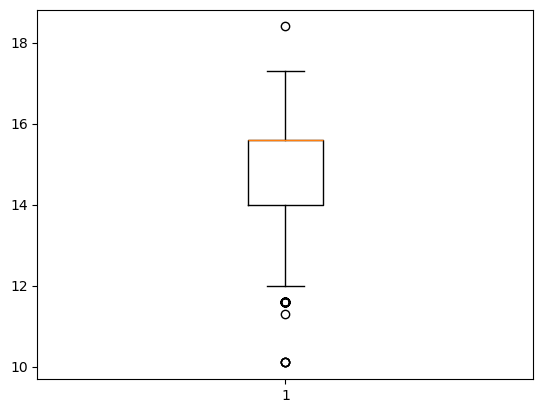

Ram


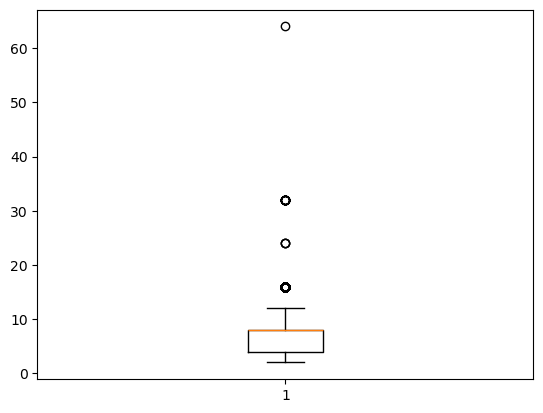

Weight


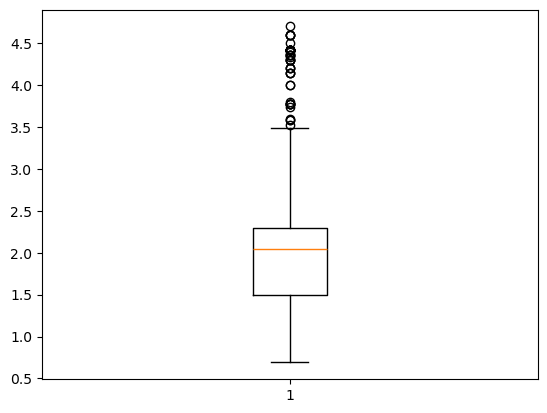

Price_euros


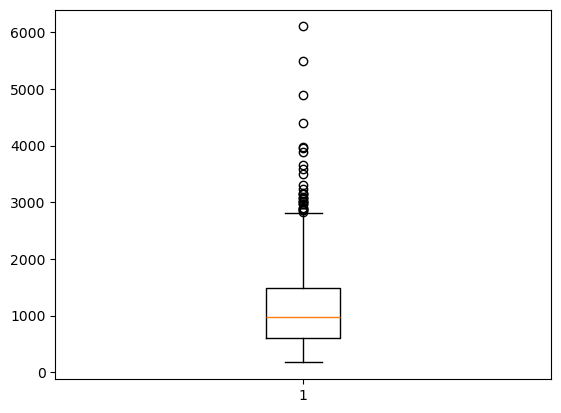

In [104]:
n_df= ["Inches","Ram","Weight","Price_euros"]
for j in n_df:
    print(j)
    plt.boxplot(df[j])
    plt.show()
#acceptable outliers
def stan(A,name):
    R=list(A[name])
    s=0
    counter=0
    for i in R:
       s=s+i
       counter=counter+1
    M=s/counter
    v=0
    for j in R:
        v=v+((j-M)**2)
    t=(v/counter)**0.5
    A[name]=(A[name]-M)/t
    return A[name]
for c in n_df:
    df[c]=stan(df,c)

In [82]:
data= df.select_dtypes(exclude='number')
for i in data:
    print(i)
    print(len(data[i].unique()))

Company
19
Product
618
TypeName
6
ScreenResolution
40
Cpu
118
Memory
39
Gpu
110
OpSys
9


In [84]:
def k_fold_category_stats(data, target_col, category_col, k=5):
    kf = sk.KFold(n_splits=k, shuffle=True)
    
    # Copy the dataframe to avoid changing the original data
    data_copy = data.copy()
    
    # Create a column to store the stats
    stat_col_name = f'{category_col}_target_mean'
    data_copy[stat_col_name] = 0.0
    
    for train_index, val_index in kf.split(data):
        train_data = data.iloc[train_index]
        val_data = data.iloc[val_index]
        
        # Calculate mean target value for each category in the training data
        category_means = train_data.groupby(category_col)[target_col].mean()
        
        # Apply the mean values to the validation data
        data_copy.loc[val_index, stat_col_name] = val_data[category_col].map(category_means)
    data_copy.update(data_copy[stat_col_name].fillna(st.mode(data_copy[stat_col_name])))
    return data_copy,stat_col_name
k = 13
for name in data:
    x,y= k_fold_category_stats(df, target_col='Price_euros', category_col=name, k=k)
    df[name]=x[y]

In [86]:
print(df)

      laptop_ID      Company      Product     TypeName  Inches  \
0             1  1575.424000  2162.055000  1554.002421    13.3   
1             2  1574.170000  1158.700000  1536.739126    13.3   
2             3  1073.165019   471.355263   769.839739    15.6   
3             4  1589.420000  1946.408889  1550.513474    15.4   
4             5  1572.940526  2091.622500  1536.131989    13.3   
...         ...          ...          ...          ...     ...   
1298       1316  1096.212113   638.000000  1291.601913    14.0   
1299       1317  1083.474789  1499.000000  1279.834746    13.3   
1300       1318  1110.382151   250.666667   785.085657    14.0   
1301       1319  1063.530307   764.000000   786.982362    15.6   
1302       1320  1110.728776   369.000000   787.014950    15.6   

      ScreenResolution          Cpu  Ram       Memory          Gpu  \
0          1748.010000  1518.550000    8   701.530423  1697.233333   
1          1085.233333  1158.700000    8   644.333333  1038.566667 

In [88]:
df=df.drop(columns=["laptop_ID"])

In [90]:
print(df.corr()["Price_euros"])

Company             0.349443
Product             0.656637
TypeName            0.611585
Inches              0.068197
ScreenResolution    0.613444
Cpu                 0.728207
Ram                 0.743007
Memory              0.721340
Gpu                 0.697125
OpSys               0.306789
Weight              0.210370
Price_euros         1.000000
Name: Price_euros, dtype: float64


In [92]:
x=df.drop(columns=["Price_euros","Inches"])
y=df["Price_euros"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 80191.76
Mean Absolute Error (MAE): 198.27
R-squared (R2): 0.85
